# Recognizing hand-written digits¶

In [2]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

In [3]:
# import datasets

digits = datasets.load_digits()

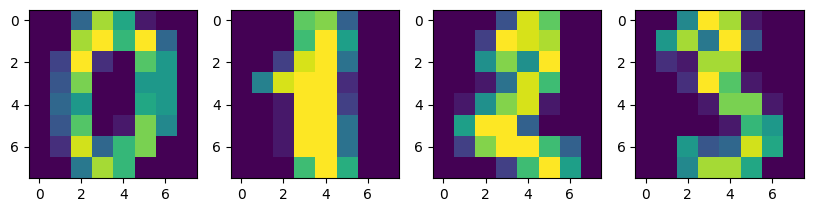

In [4]:
# create a plot with four subplots
# save second return value as 'axes' and ignore the first

# basic plot
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes,digits.images, digits.target):
    ax.imshow(image)

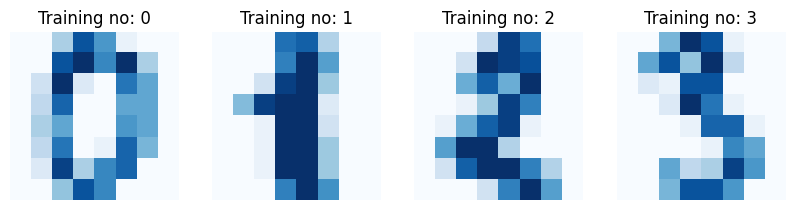

In [5]:
# make changes to the appearance of the plot

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes,digits.images, digits.target):
    ax.set_axis_off() # do not show axes and ticks
    ax.imshow(image, interpolation="nearest", cmap=plt.cm.Blues) # not sure about interpolation yet (no change observed here)
    ax.set_title("Training no: %i" % label)
    

# Classification

In [6]:
# flatten images (turn 2d array to 3d ??)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# create a support vector machine (SVM) classifier
svm_clf = svm.SVC(gamma=0.001)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

# fit model to training data
svm_clf.fit(X_train, y_train)

# predict digit using test data
answer = svm_clf.predict(X_test)

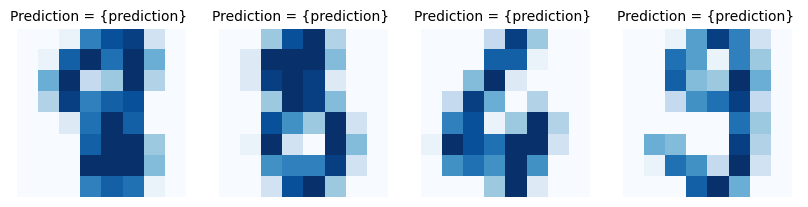

In [7]:
# visualise the predicted answer

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, prediction in zip(axes, X_test, answer):
    ax.set_axis_off() # do not show axes and ticks
    image = image.reshape(8,8)
    ax.imshow(image, interpolation="nearest", cmap=plt.cm.Blues) # not sure about interpolation yet (no change observed here)
    ax.set_title("Prediction = {prediction} ", size=10)

In [13]:
# print classification metrics
# NOTE: f inside print() are for formatted string literals. they can include expression within "{}"

print(f"Classifier: {svm_clf} \n" f"{metrics.classification_report(y_test,answer)}")

Classifier: SVC(gamma=0.001) 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


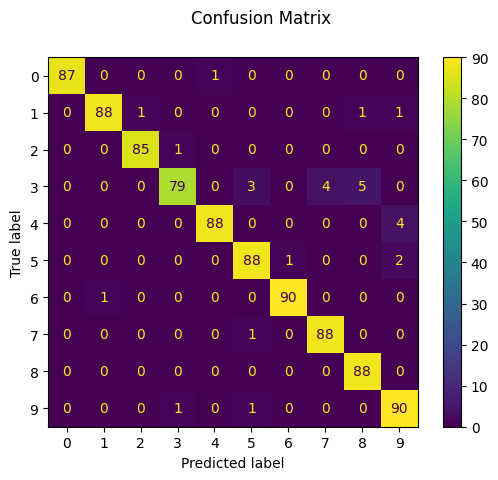

In [14]:
# confusion matrix to check for false positives and false negatives (performance overview)

confmat = metrics.ConfusionMatrixDisplay.from_predictions(y_test,answer)
confmat.figure_.suptitle("Confusion Matrix")
print(confmat.confusion_matrix)

NOTE: Confusion matrix
- rows and columns correspond to ground truth and predicted **class indices**
- diagonals : correct predictions i.e. match b/w true value and prediction
- known true values are ground truths (??)

In [17]:
# create lists for ground truth and predictions

y_true = []
y_pred = []
matrix = confmat.confusion_matrix

# iterate through confusion matrix (len*len cells) and add ground truths and predictions to corresponding lists

for gt in range(len(matrix)):             # rows
    for pred in range(len(matrix)):       # columns
        y_true += [gt] * matrix[gt][pred] # append gt as many no of times as listed in conf matrix
        y_pred += [pred] * matrix[gt][pred]

# replicate ground truth class index as many times as listed in conf matrix 

# print results

print("Classification report: \n" f"{metrics.classification_report(y_true,y_pred)}")

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899

